***

 <h1><center>Machine Learning - Boston Housing Dataset</center></h1> 

***


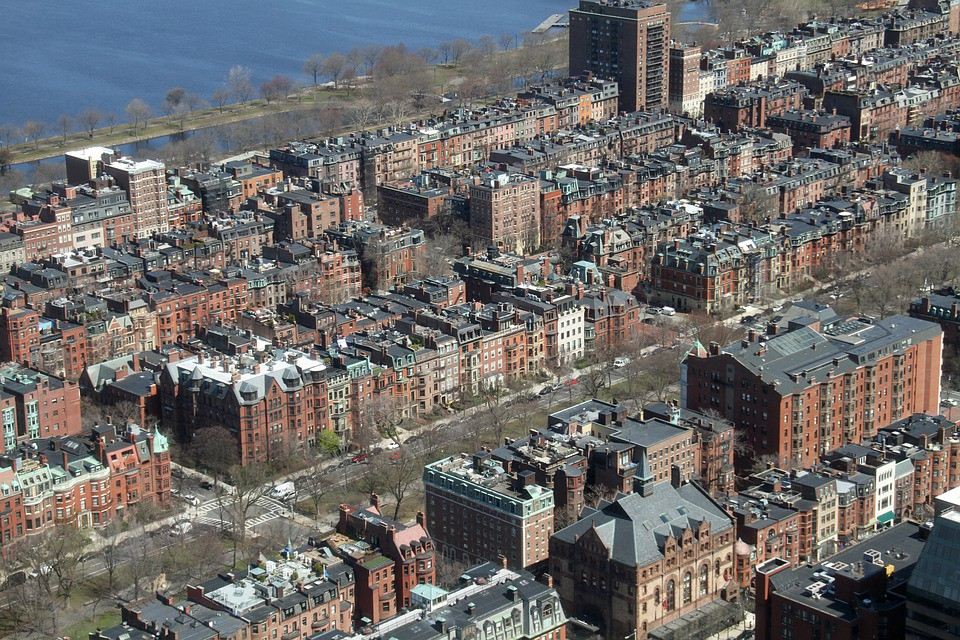

## Introduction

Boston Housing dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was originally published by Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.[1]

In this study Harrison and Rubinfield look at the problems associated with using housing market data for measuring the willingness to pay for clean air. MEDV, the median value of house prices is the dependent variable in this study and NOX, the nitrate oxides concentration is an indendent variable and a measure of air pollution. The paper makes the assumtpion that 
people will pay for better air pollution reflected in the housing value and go on to build a housing model to peredict if this is indeed the case.[2]

My reasearch into the boston housing dataset has shown that is a popular machine learning dataset and commonly referenced
in data science articles. Most of the articles focus on the variables with the highest correlation coefficient and
then go on to do some linear regression modelling.  [3][4][5]. In an artice by Ritie Ng, he notes an intereseting point that
"16 data points have an 'MEDV' value of 50.0. These data points likely contain missing or censored values and have been removed".[6] 

Within the dataset , there are 506 rows, 14 attributes with the MEDV usually being the target attribute. The definitions of these attributes are outlined in the cells below. 


Next I will outline the project requirements:

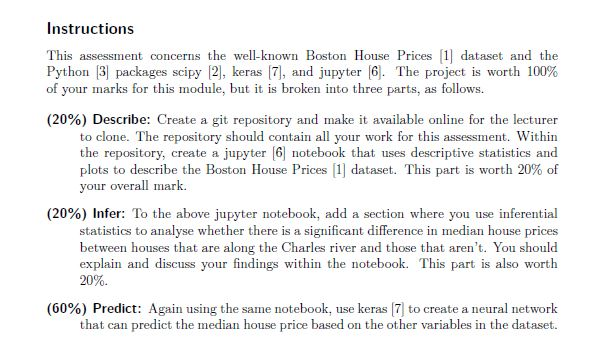

As per the project specifications, this notebook will be split into three sections starting with **descriptive** statistics on the
boston housing dataset.

First I will import the libraries needed to carry out my analysis.

In [1]:
#import python libraries for code execution
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 
import scipy.stats as ss

## ***Descriptive Statistics***

In [2]:
#dataset is avaiable in the sklearn library so we import form there
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [3]:
#prints the variables and information about the dataset
print(boston_dataset.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
#creates a dataframe for analysing the dataset
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
#.head gives me a view of the first 5 rows in the dataset
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
boston.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [29]:
#set MEDV as target variable for anaylysis and inclusion in dataset
['MEDV'] = boston_dataset.target

SyntaxError: can't assign to literal (<ipython-input-29-7a2cf1166887>, line 2)

In [7]:
#TRANSFORM ROWS TO COLUMNS to get a view of the descriptive statistics for dataset

boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


From the above summary statistics below is a description of the stats for the target variable MEDV. 

## MEDV - Median House Value

In [36]:
min_price = boston.MEDV.min()
max_price = boston.MEDV.max()
mean_price = boston.MEDV.mean()
median_price = boston.MEDV.median()
std_dev_price = boston.MEDV.std()

In [37]:
print("Min price: ${}".format(min_price)) 
print("Max price: ${}".format(max_price))
print("Mean price: ${}".format(mean_price)) # error with round function unsure why (TO BE FIXED)
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_dev_price))

Min price: $5.0
Max price: $50.0
Mean price: $22.532806324110698
Median price $21.2
Standard deviation of prices: $9.19710408737982


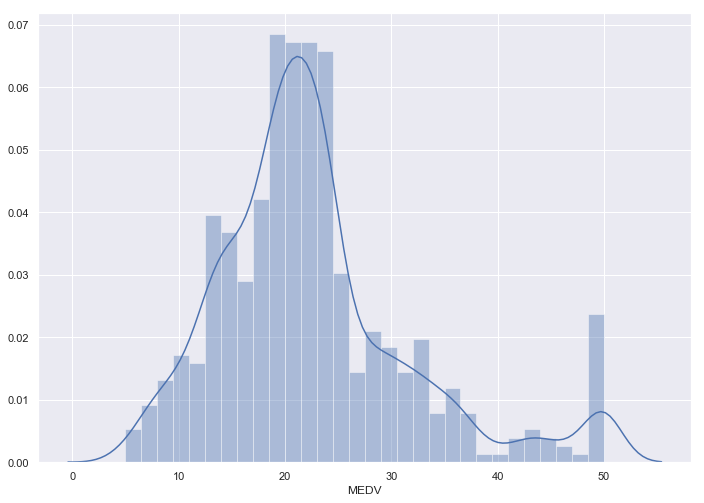

In [9]:
## plot histogram of median house prices to understand the distribution of the data
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

The distribution of the data is close to a normall distribution with some skewness to the right between the 40,000 to 50,000 price range.Most of the data points are between the 10,000 to 30,000 range as per the descriptive statistics above the chart.

Next I will get a more specific view of the outliers using a boxplot chart.

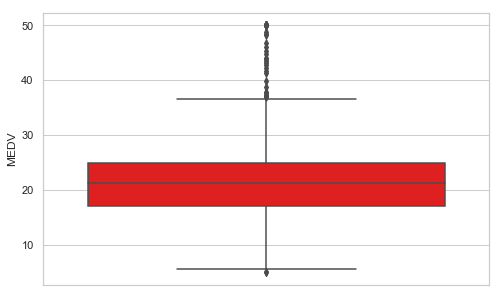

In [12]:
# plot boxplot to understand outliers
fig = plt.gcf()
fig.set_size_inches( 8, 5)
sns.set(style="whitegrid")
sns.boxplot(y="MEDV",data=boston,color="red")

As per the histogram, I can see that the outliers are mostly in the range between 40 to 50 thousand. Interestingly,
one outlier is priced at 5 housand which seems live a very low price for a home.

As previous research into the data suggests that there is a correlation between RM, LSTAT and MEDV I will look at the plots for both of these independent variables.

## LSTAT - Lower status of the population

In [44]:
min_priceLSTAT = boston.LSTAT.min()
max_priceLSTAT = boston.LSTAT.max()
mean_priceLSTAT = boston.LSTAT.mean()
median_priceLSTAT = boston.LSTAT.median()
std_dev_priceLSTAT = boston.LSTAT.std()

In [48]:
print("Min: {}%".format(min_priceLSTAT)) 
print("Max: {}%".format(max_priceLSTAT))
print("Mean: {}%".format(mean_priceLSTAT)) # error with round function unsure why (TO BE FIXED)
print("Median {}%".format(median_priceLSTAT))
print("Standard deviation: {}%".format(std_dev_priceLSTAT))

Min: 1.73%
Max: 37.97%
Mean: 12.653063241106723%
Median 11.36%
Standard deviation: 7.141061511348571%


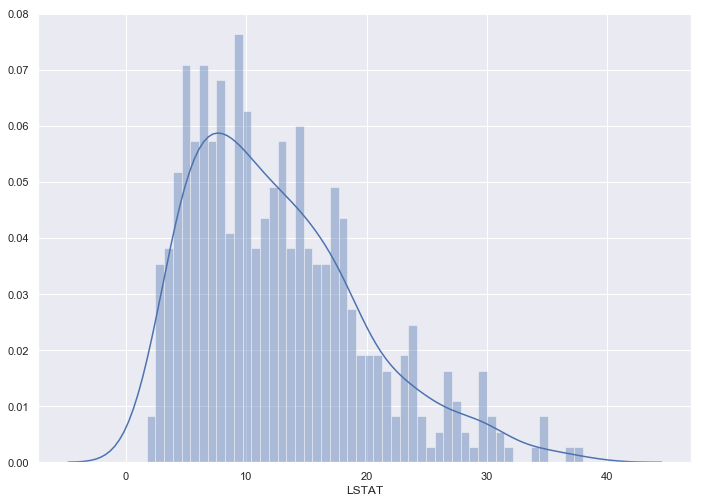

In [49]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['LSTAT'], bins=50)
plt.show()

The distribution of the LSTAT is right skewed and this can be seen visually through the longer tail to the right 
and typicaaly the mean is greater than the median in right skewed distributions and this is the case here.

Mean 12.65% > Median 11.36%

LSTAT indicates the proportion of the population in that neigbourhood that are deemed to be of lower status. We can see that 
on average 11% of the population in these neighborhoods are deemed to be of lower status with some outliers in the 30 to 40% range[6]

Next I will get a more specific view of the outliers using a boxplot chart.

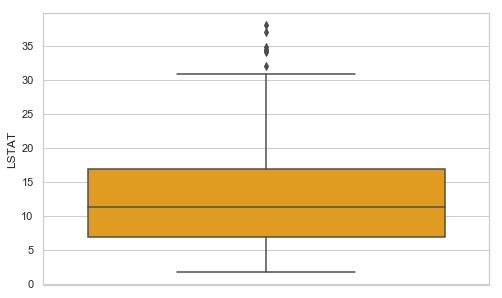

In [50]:
# plot boxplot to understand outliers
fig = plt.gcf()
fig.set_size_inches( 8, 5)
sns.set(style="whitegrid")
sns.boxplot(y="LSTAT",data=boston,color="orange")

We can see that the outliers exist in the 30 to 35% range and most of the neighbourhoods have an LSTAT between 7 and 17%.

The final variable I will investigate is RM average number of rooms per dwellling as this variable also had a strong correlation with MEDV according to previous articles.

## RM - Average number of rooms per dwelling

In [52]:
min_priceRM = boston.RM.min()
max_priceRM = boston.RM.max()
mean_priceRM = boston.RM.mean()
median_priceRM = boston.RM.median()
std_dev_priceRM = boston.RM.std()

In [53]:
print("Min: {}".format(min_priceRM)) 
print("Max: {}".format(max_priceRM))
print("Mean: {}".format(mean_priceRM)) # error with round function unsure why (TO BE FIXED)
print("Median {}".format(median_priceRM))
print("Standard deviation: {}".format(std_dev_priceRM))

Min: 3.561
Max: 8.78
Mean: 6.284634387351787
Median 6.2085
Standard deviation: 0.7026171434153237


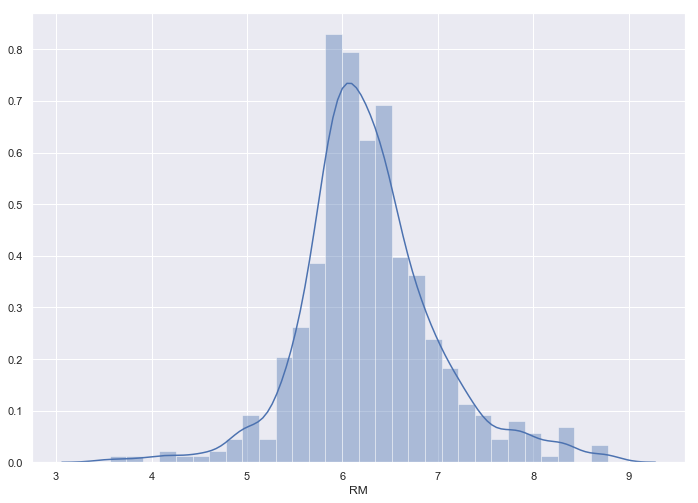

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['RM'], bins=30)
plt.show()

We can see from the above histogram that population is normally distributed and very little skewness. A typical normally distribution
would have an equal median and mean and this case both mean and median are at 6.2 rooms per dwelling. 

Next I will get a more specific view of the outliers using a boxplot chart.

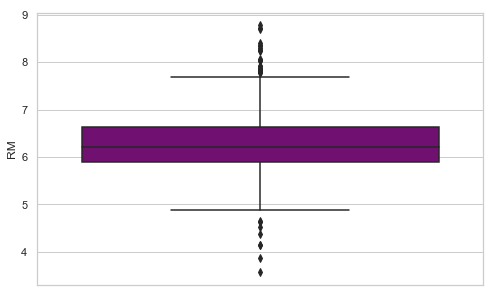

In [55]:
# plot boxplot to understand outliers
fig = plt.gcf()
fig.set_size_inches( 8, 5)
sns.set(style="whitegrid")
sns.boxplot(y="RM",data=boston,color="purple")

Boxplot indicates that the population centres around 6.2 rooms with outliers at over 8 rooms and less than 5. 

Next I will briefly look at the relationships btween the variables and then focus on the category variable CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) and
its relationship to MEDV.

In [13]:
boston["CHAScat"] = boston["CHAS"].astype('category')


In [14]:
boston.groupby('CHAScat')['MEDV'].count()

CHAScat
0.0    471
1.0     35
Name: MEDV, dtype: int64

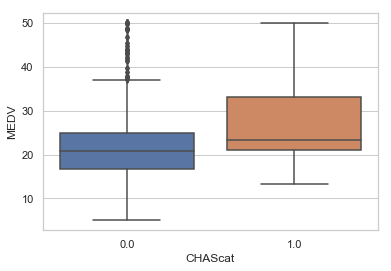

In [15]:
%matplotlib inline
sns.boxplot(x='CHAScat', y='MEDV', data=boston)

On the X axis 1 represents land that bounds the river while 0 does not. You would expect that houses closer to the river 
would have higher median prices and we see that the median house price is higher for box plot on the right, although not
significantly. The interquartile range (25 - 75% percentile) illustrated by the rectangle starts and ends much higher, at over 200,000 up to over 300,000 for houses that tract the land. This indicates that land that tracts the river have higher median house values. 

# Inferential Statistics

iNTUITIVELY 

## Correlation

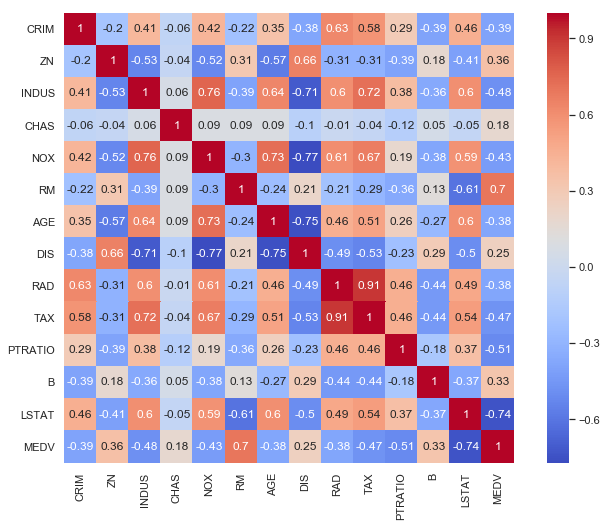

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(boston.corr().round(2), square=True, annot=True,cmap ='coolwarm')


The strongest positive correlations are displayed in dark green and the strongest negative correlations are displayed
in red - between 1 and minus 1

The dependent variable (target variable) is MEDV (median house value) and the strongest correlation is with
LSTAT (lowest status of the poulation) -0.74 and RM 0.7. A correlation can also be seen between MEDV and RM (0.7) RM and LSTAT (-0.61), but there is no correlation between MEDV and CHAS. 



As mentioned in the suumary, various articles and literature focus on MEDV as target variable and variables that have the strongest correlation with  

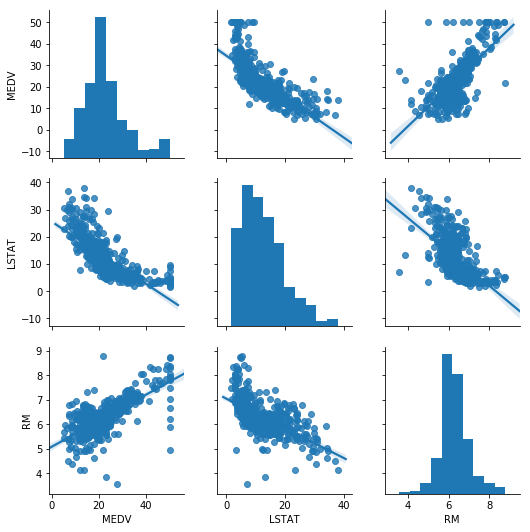

In [8]:
g = sns.pairplot(boston, vars=["MEDV", "LSTAT","RM"], kind="reg")

## T-Test

The following code cells give us an understanding of both populations i.e. mean, standard deviation of the distribution and
how skewness of the distribution. When conducting a Ttest it is importand understand these basic statistics to choose the
correct TTest. 

I decided to use a welch's Ttest to perform my analysis as the sample sizes will be different, will be unpaired and the  
variance is also different. See cells below for sample sizes, standard devaiation and skewness

The null hypoteseis for this Ttest is that the populations being tested tract 0 (houses not on the river tract) and tract1 (houses on river tract) are not statisticallly significantly different. 

If the P Value is less than 0.5 then we reject the null hypotesis and have more than 95% confidence that the conclusion of the test will be valid and not just down to random chance.

In [17]:
tract0 = boston['MEDV'][boston['CHAScat'] == 0]

In [18]:
tract1 = boston['MEDV'][boston['CHAScat'] == 1]

In [19]:
##check for similar standard deviations 
boston.groupby('CHAScat')['MEDV'].std()

CHAScat
0.0     8.831362
1.0    11.816643
Name: MEDV, dtype: float64

In [20]:
##check for similar means
boston.groupby('CHAScat')['MEDV'].mean()

CHAScat
0.0    22.093843
1.0    28.440000
Name: MEDV, dtype: float64

In [21]:
##check population sizes
boston.groupby('CHAScat')['MEDV'].count()

CHAScat
0.0    471
1.0     35
Name: MEDV, dtype: int64

In [22]:
##check for similar variances in population
boston.groupby('CHAScat')['MEDV'].skew()

CHAScat
0.0    1.056908
1.0    0.943012
Name: MEDV, dtype: float64

In [23]:
import matplotlib.patches as mpatches

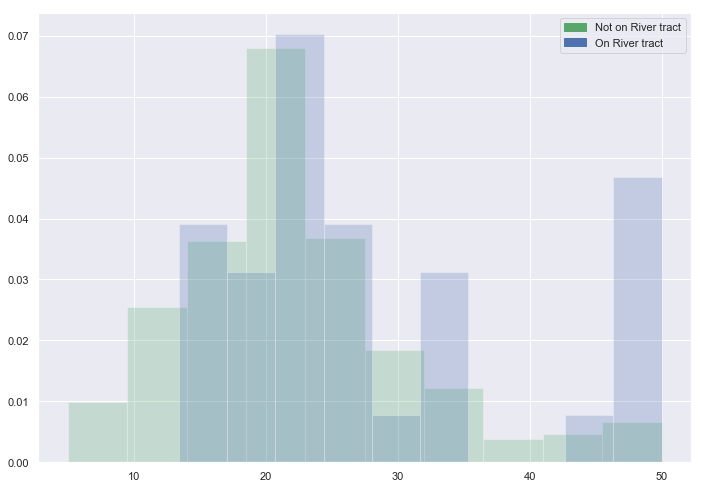

In [24]:
green_patch = mpatches.Patch(color='g', label='Not on River tract')
blue_patch = mpatches.Patch(color='b', label='On River tract')

plt.hist(tract0, density=True, color='g', alpha=0.25)
plt.hist(tract1, density=True, color='b', alpha=0.25)

plt.legend(handles=[green_patch,blue_patch])

In [25]:
ss.ttest_ind(tract0,tract1,equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

We can see that the pvalue is less than 0.5 and the null hypotesis can be rejected. Although both distributions
over the median house values in both pulation is statistically siginificantly different. 

## Linear Regression

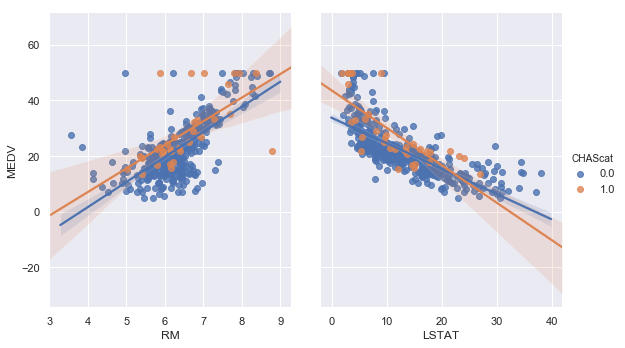

In [26]:
sns.pairplot(boston, x_vars=["RM", "LSTAT"], y_vars=["MEDV"],
             hue="CHAScat", height=5, aspect=.8, kind="reg");

In [27]:
## do liner regression where category is more visisble / also look at correlation

## References

[1] Delve 1996, 'The Boston Housing Datset', retrieved from https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html


[2] Harrison, D. & Rubinfeld, D.L. (1978). "Hedonic prices and the demand for clean air", J. Environ. Economics & Management, vol.5, 81-102

[3] Haydar A, "learning-data-science-day-9-linear-regression-on-boston-housing-dataset", retrieved from https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef

[4] Animesh A, "Linear Regression on Boston Housing Dataset", retrieved from https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

[5] Randerson, "Predict Boston House Prices Using Python & Linear Regression", retrieved from https://levelup.gitconnected.com/predict-boston-house-prices-using-python-linear-regression-90469e0a341

[6] Ng R, "Machine-learning-project-boston-home-prices", retrieved from https://www.ritchieng.com/machine-learning-project-boston-home-prices/